<AxesSubplot:>

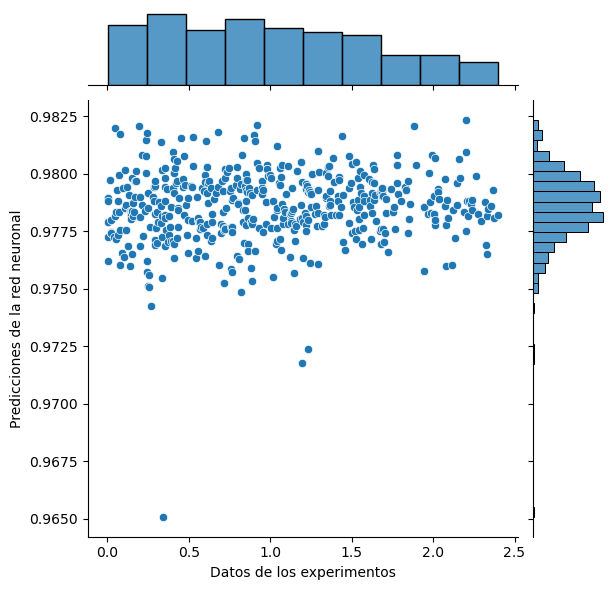

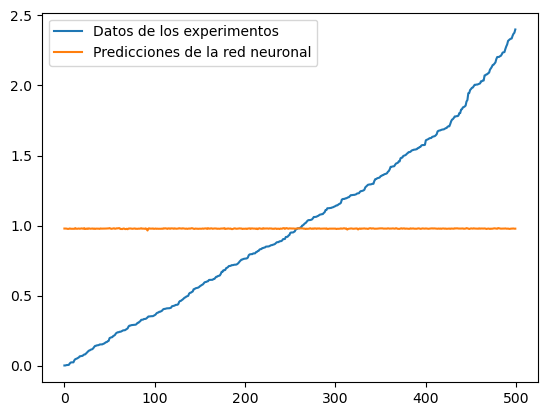

In [1]:
from custom_clss_and_fncs import * 
import seaborn as sns 

modelo = torch.load("results/state_dicts/best_evaluated_model.pt")
modelo.load_state_dict(torch.load("results/state_dicts/state_dict_best_evaluated_model.pth"))

with open('results/data/lista_de_grafos.pkl', 'rb') as file:
      
    # Call load method to deserialze
    lista_de_grafos = pickle.load(file)



batch_size = 10
loader = make_loader(lista_de_grafos,batch_size = 10,num_samples = 500)


predictions: list = []
true_values: list = []
modelo.eval()
for data in loader:
    data.to('cuda')
    prediction = modelo(data.x, data.edge_index, batch_size = batch_size)
    predictions.extend(prediction.squeeze().tolist())
    true_values.extend(data.y.squeeze().tolist())
    
sorted_idxs = np.argsort(true_values)

evaluation = pd.DataFrame(
        {'Datos de los experimentos': [true_values[i] for i in sorted_idxs],
        'Predicciones de la red neuronal':[predictions[i] for i in sorted_idxs]}
    ) 
sns.jointplot(x=evaluation.iloc[:,0], y = evaluation.iloc[:,1])

evaluation.plot()